# Tutorial de solución de ecuaciones diferenciales con parámetros constantes
### Lourdes Martín-Aguilar, Cesar Flores-Lopez & Marco Herrera Valdez
#### Facultad de Ciencias, Universidad Nacional Autónoma de México

Supongamos que la concentración de un metabolito ($x$, mM) en el torrente sanguíneo es influenciada por dos hormonas de manera distinta. Si la concentración del metabolito tiende a un valor $a$ en la ausencia de influencias externas, los cambios en $x$ con respecto al tiempo se pueden determinar resolviendo una ecuación de la forma  
\begin{equation}
\partial_t x = \frac{a - x}{\tau} + f(t), 
\end{equation}
donde $f$ es una función de forzamiento que representa una influencia externa, a partir de una condición inicial $x(t_0) = x_0$. Si las influencias de las dos hormonas mencionadas anteriormente se pueden representar con funciones $f_1(t)$ y $f_2(t)$, entonces nos interesa comparar el comportamiento de $x$ con respecto a $f_1$ y $f_2$ en el tiempo.

Las soluciones son obtenidas 
utilizando las rutinas de integración numérica del módulo _scipy_ de _python_. 




Primero debemos importar los módulos necesarios.

In [14]:
import scipy as sc
import scipy.integrate as integ
import matplotlib.pylab as gr
%matplotlib inline

Después hacemos un diccionario con los parámetros y arreglos necesarios para la integración numérica.

In [54]:
p=dict()
p["t0"]=5; p["ic"]=10.0;
p["a"]=5.0; p["A1"]=2; p["A2"]=0.3
p["tau"]=5.0; p["tauAlpha"]=0.5; p["height"]=0.3; 
p["freq"]=0.3; 
p["timeMax"]=30.0; p["timeStep"]=0.1;
p["sampTimes"]= sc.arange(0,p["timeMax"],p["timeStep"])
print(p.keys())

dict_keys(['height', 'a', 't0', 'A1', 'freq', 'sampTimes', 'ic', 'tau', 'timeMax', 'tauAlpha', 'timeStep', 'A2'])


Las funciones de forzamiento que utilizaremos como ejemplos son:
\begin{eqnarray}
f_1(t)=\alpha\left(t,t_0,\tau_{\alpha}\right)&=& H(t>t_0)\frac{t-t_0}{\tau_{\alpha}}\left(1- \frac{t-t_0}{\tau_{\alpha}} \right)
\\
f_2(t)=\sin\left(t,t_0,\omega\right)&=& H(t>t_0) \sin \left[\left(t-t_0\right)2\pi \right]
\end{eqnarray}
La función $f_1$ representa un pulso con comienzo súbito en un tiempo $t_0$ y decaimiento exponencial con una constante de tiempo $\tau_{\alpha}$. La función $f_2$ representa una fluctuación periódica de forma sinusoidal que comienza también en $t=t_0$.

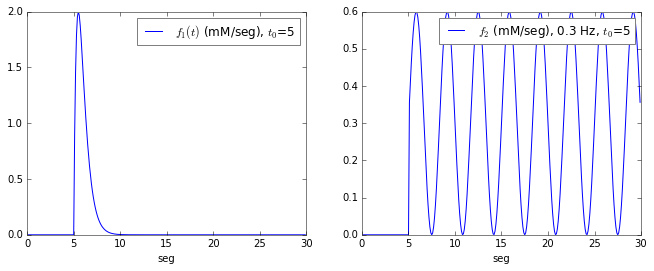

In [68]:
alpha= lambda t,q: p["A1"]*sc.int32(t>p["t0"])*((t-p["t0"])/q["tauAlpha"])*sc.exp(1-(t-p["t0"])/q["tauAlpha"]) 
sine = lambda t,q: sc.int32(t>p["t0"])* p["A2"]*(1+sc.sin((t-p["t0"])*q["freq"]*2*sc.pi))
# Graficas de las funciones alpha y sine
fi=gr.figure(figsize=(11,4)); gr.ioff(); 
ax1=fi.add_subplot(1,2,1); ax2=fi.add_subplot(1,2,2)
ax1.plot(p["sampTimes"],alpha(p["sampTimes"],p),label=r"$f_1(t)$ (mM/seg), $t_0$=%g"%(p["t0"]))
ax2.plot(p["sampTimes"],sine(p["sampTimes"],p),label=r"$f_2$ (mM/seg), %g Hz, $t_0$=%g"%(p["freq"],p["t0"]))
ax1.set_xlabel("seg"); ax2.set_xlabel("seg")
ax1.legend(); ax2.legend(); gr.ion(); gr.draw()

Definimos una función que calcule el cambio en $x$ para que _Python_ la integre numéricamente:

In [69]:
def linearForcedEq(x,t,p):
    dx = (p["a"]-x)/p["tau"] + p['f'](t,p)
    return dx #la función integrate.odeint de _scipy_

Ahora integramos la función usando la función integrate.odeint de _scipy_

In [70]:
p["t0"]=5; p["ic"]=10.0; p["a"]=3.0; p["A1"]=2; p["A2"]=0.3
p["tau"]=5.0; p["tauAlpha"]=0.5; p["freq"]=0.3; 
p["timeMax"]=30.0; p["timeStep"]=0.1;
p["sampTimes"]= sc.arange(0,p["timeMax"],p["timeStep"])
# Integración numérica
p["f"]=sine
uSine= integ.odeint(func=linearForcedEq, y0=p["ic"], t=p["sampTimes"],args=(p,)).transpose()
p["f"]=alpha
uAlpha= integ.odeint(func=linearForcedEq, y0=p["ic"], t=p["sampTimes"],args=(p,)).transpose()

Graficamos la solución.

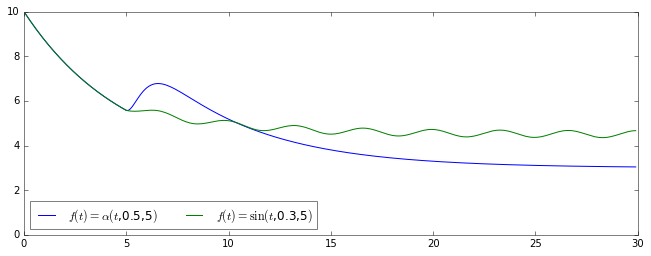

In [71]:
gr.figure(figsize=(11,4))
gr.plot(p["sampTimes"],uAlpha[0],label=r"$f(t)=\alpha(t$,%g,%g$)$"%(p["tauAlpha"],p["t0"]))
gr.plot(p["sampTimes"],uSine[0],label=r"$f(t)=\sin(t$,%g,%g$)$"%(p["freq"],p["t0"]))
gr.ylim(0,p["ic"])
gr.legend(loc="lower left",ncol=2)